Objective
===
不使用瀏覽器開啟網頁

## Resources

**圖片顯示**
1. [OpenCV basic techniques of read and show images](https://blog.gtwang.org/programming/opencv-basic-image-read-and-write-tutorial/)

2. [Display an Image with python - stackoverflow](https://stackoverflow.com/questions/35286540/display-an-image-with-python)

**Scrapy爬蟲和資料處理**
1. [IT邦 - 鐵人30天](https://ithelp.ithome.com.tw/users/20107514/ironman/1919?page=1)

2. [httpbin](https://httpbin.org/#/Images/get_image_jpeg) 

## Problem 



## 1. webbrowser 模組
可以開啟指定網頁

In [1]:
import webbrowser
webbrowser.open('https://www.youtube.com')

True

## 認識 Google maps
之前交換program 到紐約的 Empire State Building
從 Google maps 上來看可以將之分成三大區塊 [Empire State Building](https://www.google.com/maps/place/Empire+State+Building/@40.7484402,-73.9943977,15z/data=!3m1!4b1!4m5!3m4!1s0x89c259a9b3117469:0xd134e199a405a163!8m2!3d40.7484405!4d-73.9856644)
1. https://www.google.com/maps/place/Empire+State+Building/
2. 40.7484402,-73.9943977
3. 15z/data=!3m1!4b1!4m5!3m4!1s0x89c259a9b3117469:0xd134e199a405a163!8m2!3d40.7484405!4d-73.9856644

## 1. 用地址查詢地圖的程式設計

In [3]:
import webbrowser 
address = input('請輸入地址: ')
webbrowser.open('https://www.google.com/maps/place/' + address)

請輸入地址: empire state building in new york


True

## 2. 下載網頁資訊使用 requests.get() 模組
1. Python has its own built-in library ```urlilb```
2. The other library```requests```

In [2]:
import requests

url = 'https://www.youtube.com/watch?v=Qu1ZTCEw6wg'
htmlfile = requests.get(url)
print(type(htmlfile))

<class 'requests.models.Response'>


## 3. 取得網頁資料後得到 Response 物件: 認識 Response 物件
1. status_code: 如果值是 requests.codes.ok，表示獲取網頁內容成功
2. text: 網頁內容

In [6]:
# 檢查獲得網頁是否成功
import requests

url = 'https://stackoverflow.com/questions/37858289/change-data-urllib-parse-urlencodevalues-to-python-2-7'
htmlfile = requests.get(url)
if htmlfile.status_code == requests.codes.ok:
    print('Yeah, we get the info from website.')
else:
    print("Sorry, we don't get the info from website.")

Yeah, we get the info from website.


## 取得網頁內容大小

In [12]:
# 檢查獲得網頁是否成功
import requests

url = 'https://stackoverflow.com/questions/37858289/change-data-urllib-parse-urlencodevalues-to-python-2-7'
htmlfile = requests.get(url)
if htmlfile.status_code == requests.codes.ok:
    print('Yeah, we get the info from website.')
    print('The size of info = ', len(htmlfile.text))
else:
    print("Sorry, we don't get the info from website.")

Yeah, we get the info from website.
The size of info =  152155


每個單位的網頁會常常變動，所以讀取的資料數會不同<br>
152254<br>
152160<br>
151118<br>
151841<br>
152155<br>

In [16]:
# 列印網頁內容
import requests

url = 'https://stackoverflow.com/questions/37858289/change-data-urllib-parse-urlencodevalues-to-python-2-7'
htmlfile = requests.get(url)
if htmlfile.status_code == requests.codes.ok:
    print('Yeah, we get the info from website.\n')
    print('The size of info = \n', len(htmlfile.text))
    print(htmlfile.text)
else:
    print("Sorry, we don't get the info from website.")

Yeah, we get the info from website.

The size of info = 
 152406
<!DOCTYPE html>


    <html itemscope itemtype="http://schema.org/QAPage" class="html__responsive">

    <head>

        <title>change &quot;data = urllib.parse.urlencode(values) &quot; to python 2.7 - Stack Overflow</title>
        <link rel="shortcut icon" href="https://cdn.sstatic.net/Sites/stackoverflow/Img/favicon.ico?v=ec617d715196">
        <link rel="apple-touch-icon" href="https://cdn.sstatic.net/Sites/stackoverflow/Img/apple-touch-icon.png?v=c78bd457575a">
        <link rel="image_src" href="https://cdn.sstatic.net/Sites/stackoverflow/Img/apple-touch-icon.png?v=c78bd457575a"> 
        <link rel="search" type="application/opensearchdescription+xml" title="Stack Overflow" href="/opensearch.xml">
        <link rel="canonical" href="https://stackoverflow.com/questions/37858289/change-data-urllib-parse-urlencodevalues-to-python-2-7" />
        <meta name="viewport" content="width=device-width, height=device-height, i

## 4. 搜尋網頁特定內容，類似 Ctrl + F 功能
2種方法可以搜尋
```python
import requests
import re
```

In [20]:
import requests
import re

url = 'https://stackoverflow.com/questions/48233433/format-numbers-as-float-or-int-using-json-in-python'

htmlfile = requests.get(url)
if htmlfile.status_code == requests.codes.ok:
    pattern = input('輸入欲搜尋的字串: ')

# 方法一，看起來直觀，只能確定有沒有存在
    if pattern in htmlfile.text:
        print('搜尋 %s 成功' % pattern)
    else: 
        print('搜尋 %s 失敗' % pattern)
# 方法二，如果找到放在串列 name 內
    name = re.findall(pattern, htmlfile.text)
    if name != None:
        print('%s 出現了 %d 次' % (pattern, len(name)))
    else:
        print('%s 出現了 0 次' % (pattern))
else:
    print('網頁下載失敗')

輸入欲搜尋的字串: what
搜尋 what 成功
what 出現了 8 次


## 5. 下載網頁失敗的異常處理
當我們輸入錯誤網址，或有些網頁有反爬蟲機制，造成下載網頁異常<br>
而 Response 物件有 ```raise_for_status()```的指令，可以針對網址正確但是後續檔案名稱錯誤的狀況產生異常處理

In [25]:
# ch3_9.py
import requests

url = 'http://www.mcut.edu.tw/file_not_existed'  # 不存在的內容
htmlfile = requests.get(url)
try:
    htmlfile.raise_for_status()                 # 異常處理
    print("下載成功")
except Exception as err:                        # err是系統自訂的錯誤訊息
    print("%s\n" % err)
print("程式結束")

404 Client Error: Not Found for url: https://www.mcut.edu.tw/file_not_existed

程式結束


---
下面程式碼出現錯誤，我們發現是 htmlfile 在抓取網頁內容失敗
```python
HTTPConnectionPool(host='www.gzaxxc.com', port=80): Max retries exceeded with url: /file_not_existed (Caused by NewConnectionError('<urllib3.connection.HTTPConnection object at 0x0000017FE5443BC8>: Failed to establish a new connection: [Errno 11001] getaddrinfo failed'))
```

In [21]:
# ch3_10.py
import requests

url = 'http://www.gzaxxc.com/file_not_existed'  # 錯誤的網址
htmlfile = requests.get(url)
try:
    htmlfile.raise_for_status()                 # 異常處理
    print("下載成功")
except Exception as err:                        # err是系統自訂的錯誤訊息
    print("網頁下載失敗: %s" % err)
print("程式結束")

ConnectionError: HTTPConnectionPool(host='www.gzaxxc.com', port=80): Max retries exceeded with url: /file_not_existed (Caused by NewConnectionError('<urllib3.connection.HTTPConnection object at 0x0000017FE5443BC8>: Failed to establish a new connection: [Errno 11001] getaddrinfo failed'))

由於上面程式碼在執行時``產生中斷``，所以我們改變一下程式碼

In [31]:
# ch3.11.py
import requests

url = 'http://www.gzaxxc.com/file_not_existed'  # 錯誤的網址
try:
    htmlfile = requests.get(url)
    htmlfile.raise_for_status()                 # 異常處理
    print("下載成功")
    
except Exception as err:                        # err是系統自訂的錯誤訊息
    print("網頁下載失敗:\n%s" % err)
    
print("\n程式結束")

網頁下載失敗:
HTTPConnectionPool(host='www.gzaxxc.com', port=80): Max retries exceeded with url: /file_not_existed (Caused by NewConnectionError('<urllib3.connection.HTTPConnection object at 0x0000017FE54D1248>: Failed to establish a new connection: [Errno 11001] getaddrinfo failed'))

程式結束


## 6. 網頁伺服器造成的阻擋 (網站對爬蟲的封鎖)
1. **基於安全理由**: 瞬間索取大量資料 = 惡意程式
但是可以利用 time.sleep() 繞開此問題
2. 不想讓太多網路爬蟲造訪，避免**網路流量過度增加**，造成伺服器負擔
3. 網站方希望爬蟲方遵循相關規範存取資料
![](https://i.imgur.com/8CtwDpV.jpg)

4. ```htmlfile.raise_for_status()```可以列出 "錯誤原因"，當 html擷取網頁內容有錯誤時


In [32]:
# ch3_12.py
import requests

url = 'http://aaa.24ht.com.tw/'
htmlfile = requests.get(url)
# 可以列出 "錯誤原因"，當 html擷取網頁內容有錯誤時
htmlfile.raise_for_status()

HTTPError: 406 Client Error: Not Acceptable for url: http://aaa.24ht.com.tw/

In [35]:
# ch3_12_1.py
import requests

url = 'https://www.kingstone.com.tw/new/basic/2013120504769?zone=book&lid=search&actid=WISE'
# url = 'https://www.kingstone.com.tw/'
htmlfile = requests.get(url)
htmlfile.raise_for_status()

HTTPError: 400 Client Error:  for url: https://www.kingstone.com.tw/

## 7. 爬蟲程式偽裝成瀏覽器(相當複雜，之後會再提)

方法是在城市前端加上**表頭(headers)內容**，表頭是一個字典形式的資料，最常見的表頭欄位為 'User-Agent' <br>
表頭(headers) 最主要的欄位 'User-Agent'，這是瀏覽器/ 爬蟲程式向網站連結時**表明身分**

我們這裡要練習將```# ch3_12.py```改變。練習如何使用**偽裝瀏覽器的方式**，像網頁索取資料
```python
headers = { 'User-Agent':'Mozilla/5.0 (Windows NT 6.1; WOW64)\
            AppleWebKit/537.36 (KHTML, like Gecko) Chrome/45.0.2454.101\
            Safari/537.36', }
```

In [37]:
# ch3_12.py
import requests

headers = { 'User-Agent':'Mozilla/5.0 (Windows NT 6.1; WOW64)\
            AppleWebKit/537.36 (KHTML, like Gecko) Chrome/45.0.2454.101\
            Safari/537.36', }
url = 'http://aaa.24ht.com.tw/'

htmlfile = requests.get(url, headers = headers)
# 可以列出 "錯誤原因"，當 html擷取網頁內容有錯誤時
htmlfile.raise_for_status()

print('偽裝瀏覽器擷取網路資料成功')

偽裝瀏覽器擷取網路資料成功


In [38]:
import requests

headers = {'User-Agent': 'Mozilla/5.0 (Windows NT 10.0; Win64; x64) \
            AppleWebKit/537.36 (KHTML, like Gecko) Chrome/84.0.4147.135 \
            Safari/537.36',}

url = 'http://aaa.24ht.com.tw/'

htmlfile = requests.get(url, headers = headers)
# 可以列出 "錯誤原因"，當 html擷取網頁內容有錯誤時
htmlfile.raise_for_status()

print('偽裝瀏覽器擷取網路資料成功')

偽裝瀏覽器擷取網路資料成功


## 8. 認識 robot.txt
robot.txt 是一個儲存於網站跟目錄下的文字格式檔案，因為網路上大小寫是敏感的，所以統一使用小寫。

**Remind**: robot.txt 並不識一個規範，而是長久被使用約定成俗習慣

---
下面檔案練習是將**網站內容存入:**
1. 找取目標網站
2. 擷取目標網站內容
3. 將網站內容以"二進位"儲存於

In [45]:
# ch3_14.py
import requests

# url = 'http://www.deepmind.com.tw'                     # 網址
url = 'https://www.facebook.com/fairytalesteller'
try:
    htmlfile = requests.get(url)
    print("下載成功")
except Exception as err:                                # err是系統自訂的錯誤訊息
    print("網頁下載失敗: %s" % err)
# 儲存網頁內容
fn = 'out3_14.txt'
with open(fn, 'wb') as file_Obj:                        # 以二進位儲存
    for diskStorage in htmlfile.iter_content(40960):    # Response物件處理
        size = file_Obj.write(diskStorage)              # Response物件寫入
        print(size)                                     # 列出每次寫入大小
    print("以 %s 儲存網頁HTML檔案成功" % fn)

下載成功
40960
40960
40960
40960
40960
28667
以 out3_14.txt 儲存網頁HTML檔案成功


## 9. 檢視網頁原始檔

## 10. 下載網頁資訊使用 urllib 模組
urllib:
1. request 模組: 可開啟指定網址的 HTML 網頁文件內容
2. parse 模組: 可以解析 URL
3. error 模組: 內有 urllib.request() 發生錯誤或異常的原因
4. robotparser 模組: 可以解析 robot.txt 文件

---
### 1. urllib.request() 模組
1. ```urlopen(url)```可以獲得網頁 HTTPResponse 物件
2. 利用```read()```讀取物件 HTTPResponse 回傳之網頁<br>
但是 read() 是二進位制顯示，需轉成 'utf-8' 碼

In [50]:
import urllib.request

# url = 'https://www.youtube.com/'
url ='https://stackoverflow.com/questions/63508254/filenotfounderror-errno-2-no-such-file-or-directory-data-json-in-vs-code'
htmlfile = urllib.request.urlopen(url)
print(htmlfile.read())

b'<!DOCTYPE html>\r\n\r\n\r\n    <html itemscope itemtype="http://schema.org/QAPage" class="html__responsive">\r\n\r\n    <head>\r\n\r\n        <title>python - (FileNotFoundError: [Errno 2] No such file or directory: &#39;data.json&#39;) in VS Code, but no error in Pycharm, why? - Stack Overflow</title>\r\n        <link rel="shortcut icon" href="https://cdn.sstatic.net/Sites/stackoverflow/Img/favicon.ico?v=ec617d715196">\r\n        <link rel="apple-touch-icon" href="https://cdn.sstatic.net/Sites/stackoverflow/Img/apple-touch-icon.png?v=c78bd457575a">\r\n        <link rel="image_src" href="https://cdn.sstatic.net/Sites/stackoverflow/Img/apple-touch-icon.png?v=c78bd457575a"> \r\n        <link rel="search" type="application/opensearchdescription+xml" title="Stack Overflow" href="/opensearch.xml">\r\n        <link rel="canonical" href="https://stackoverflow.com/questions/63508254/filenotfounderror-errno-2-no-such-file-or-directory-data-json-in-vs-code" />\r\n        <meta name="viewport" c

使用```decode('utf-8')```解中文的二進位碼

In [54]:
import urllib.request

url = 'https://www.youtube.com/'
htmlfile = urllib.request.urlopen(url)
print(htmlfile.read().decode('utf-8'))

<!doctype html><html  style="font-size: 10px;font-family: Roboto, Arial, sans-serif;" lang="zh-TW" dir="ltr" gl="TW"><head><meta http-equiv="X-UA-Compatible" content="IE=edge" /><meta http-equiv="origin-trial" data-feature="Web Components V0" data-expires="2020-10-23" content="AhbmRDASY7NuOZD9cFMgQihZ+mQpCwa8WTGdTx82vSar9ddBQbziBfZXZg+ScofvEZDdHQNCEwz4yM7HjBS9RgkAAABneyJvcmlnaW4iOiJodHRwczovL3lvdXR1YmUuY29tOjQ0MyIsImZlYXR1cmUiOiJXZWJDb21wb25lbnRzVjAiLCJleHBpcnkiOjE2MDM0ODY4NTYsImlzU3ViZG9tYWluIjp0cnVlfQ=="><meta http-equiv="origin-trial" data-feature="Web Components V0" data-expires="2020-10-27" content="Av2+1qfUp3MwEfAFcCccykS1qFmvLiCrMZ//pHQKnRZWG9dldVo8HYuJmGj2wZ7nDg+xE4RQMQ+Ku1zKM3PvYAIAAABmeyJvcmlnaW4iOiJodHRwczovL2dvb2dsZS5jb206NDQzIiwiZmVhdHVyZSI6IldlYkNvbXBvbmVudHNWMCIsImV4cGlyeSI6MTYwMzgzNjc3MiwiaXNTdWJkb21haW4iOnRydWV9"><meta http-equiv="origin-trial" data-feature="Web Components V0" data-expires="2021-01-08" content="AixUK+8UEShlt6+JX1wy9eg+XL+eV5PYSEDPH3C90JNVbIkE1Rg1FyVUfu

## urlopen 有一個參數 timeout (unit = s)
```urlopen(url, timeout = 20)```
預設時間是20秒，超出時間就會跳出異常

In [ ]:
import urllib.request

url = 'https://www.youtube.com/'
htmlfile = urllib.request.urlopen(url, timeout = 20)
print(htmlfile.read().decode('utf-8'))

## 11. 認識幾個 http.client.HTTPResponse 物件屬性

version: 版次編號<br>
geturl(): 物件的 URL 網址<br>
status: 下載狀況，如果回傳 200 代表正常<br>
getheaders(): 取得用串列方式存在的表頭 (headers) 內容<br>

In [62]:
import urllib.request

# 要查詢的網址
url = 'https://www.youtube.com/'
htmlfile = urllib.request.urlopen(url)

print('版本: ', htmlfile.version)
print('網址: ', htmlfile.geturl())
print('下載: ', htmlfile.status)
print('\n表頭: ')
for header in htmlfile.getheaders():
        print(header)


版本:  11
網址:  https://www.youtube.com/
下載:  200

表頭: 
('X-Frame-Options', 'SAMEORIGIN')
('Cache-Control', 'no-cache')
('Content-Type', 'text/html; charset=utf-8')
('Expires', 'Tue, 27 Apr 1971 19:44:06 GMT')
('X-Content-Type-Options', 'nosniff')
('P3P', 'CP="This is not a P3P policy! See http://support.google.com/accounts/answer/151657?hl=zh-TW for more info."')
('Strict-Transport-Security', 'max-age=31536000')
('Date', 'Wed, 02 Sep 2020 09:20:01 GMT')
('Server', 'YouTube Frontend Proxy')
('X-XSS-Protection', '0')
('Set-Cookie', 'VISITOR_INFO1_LIVE=Xf-HHpJpF3s; path=/; domain=.youtube.com; secure; expires=Mon, 01-Mar-2021 09:20:01 GMT; httponly; samesite=None')
('Set-Cookie', 'YSC=cr-rSf_EQzk; path=/; domain=.youtube.com; secure; httponly; samesite=None')
('Set-Cookie', 'GPS=1; path=/; domain=.youtube.com; expires=Wed, 02-Sep-2020 09:50:01 GMT')
('Alt-Svc', 'h3-29=":443"; ma=2592000,h3-27=":443"; ma=2592000,h3-T051=":443"; ma=2592000,h3-T050=":443"; ma=2592000,h3-Q050=":443"; ma=2592000

## 12. 將表頭應用在urllib.request 模組，使用 Request() 方法

In [2]:
import urllib.request 

headers = { 'User-Agent':'Mozilla/5.0 (Windows NT 6.1; WOW64)\
            AppleWebKit/537.36 (KHTML, like Gecko) Chrome/45.0.2454.101\
            Safari/537.36', }

url = 'http://aaa.24ht.com.tw/'
# Request 進入此網站 in a header way
req = urllib.request.Request(url, headers = headers)
# Request.urlopen 要求打開此網站內容
htmlfile = urllib.request.urlopen(req)
print(htmlfile.read().decode('utf-8'))

for header in htmlfile.getheaders():
    print(header)

﻿<!doctype html>
<html>
<head>
   <meta charset="utf-8">
   <title>洪錦魁著作</title>
   <style>
      h1#author { width:400px; height:50px; text-align:center;
	     background:linear-gradient(to right,yellow,green);
      }
	  h1#content { width:400px; height:50px;
		 background:linear-gradient(to right,yellow,red); 
      }
      section { background:linear-gradient(to right bottom,yellow,gray); }
   </style>
</head>
<body>
<h1 id="author">洪錦魁</h1>
<img src="hung.jpg" width="100">
<section>
   <h1 id="content">一個人的極境旅行 - 南極大陸北極海</h1>
   <p>2015/2016年<strong>洪錦魁</strong>一個人到南極</p>
   <img src="travel.jpg" width="300"
</section>
<section>
   <h1 id="content">HTML5+CSS3王者歸來</h1>
   <p>本書講解網頁設計使用HTML5+CSS3</p>
   <img src="html5.jpg" width="300">
</section>
</body>
</html>
('Date', 'Mon, 07 Sep 2020 06:47:59 GMT')
('Server', 'Apache')
('Last-Modified', 'Tue, 24 Oct 2017 03:22:31 GMT')
('Accept-Ranges', 'bytes')
('Content-Length', '872')
('Vary', 'Accept-Encoding,User-Agent')
('Connection', 'c

In [67]:
import urllib.request

url = 'http://aaa.24ht.com.tw/'
req = urllib.request.Request(url, headers = headers)
htmlfile = urllib.request.urlopen(req)
print(htmlfile.read().decode('utf-8'))
for header in htmlfile.getheaders():
    print(header)

﻿<!doctype html>
<html>
<head>
   <meta charset="utf-8">
   <title>洪錦魁著作</title>
   <style>
      h1#author { width:400px; height:50px; text-align:center;
	     background:linear-gradient(to right,yellow,green);
      }
	  h1#content { width:400px; height:50px;
		 background:linear-gradient(to right,yellow,red); 
      }
      section { background:linear-gradient(to right bottom,yellow,gray); }
   </style>
</head>
<body>
<h1 id="author">洪錦魁</h1>
<img src="hung.jpg" width="100">
<section>
   <h1 id="content">一個人的極境旅行 - 南極大陸北極海</h1>
   <p>2015/2016年<strong>洪錦魁</strong>一個人到南極</p>
   <img src="travel.jpg" width="300"
</section>
<section>
   <h1 id="content">HTML5+CSS3王者歸來</h1>
   <p>本書講解網頁設計使用HTML5+CSS3</p>
   <img src="html5.jpg" width="300">
</section>
</body>
</html>
('Date', 'Wed, 02 Sep 2020 09:23:35 GMT')
('Server', 'Apache')
('Last-Modified', 'Tue, 24 Oct 2017 03:22:31 GMT')
('Accept-Ranges', 'bytes')
('Content-Length', '872')
('Vary', 'Accept-Encoding,User-Agent')
('Connection', 'c

## 13. 使用urllib.request() 模組的 urlretrieve() 方法下載圖片

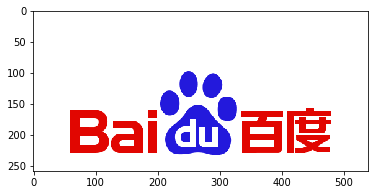

In [4]:
import urllib.request
import matplotlib.pyplot as plt 
import matplotlib.image as mpimg

url_pict = 'https://baidu.com/img/bd_logo1.png'
fn = 'baidu.png'
pict = urllib.request.urlretrieve(url_pict, fn)

img = mpimg.imread(fn)
imgplot = plt.imshow(img)
plt.show()

## urllib.parse 模組
2 個重要方法
1. quote(): 將中文轉成 URL 編碼
2. unquote(): 將 URL 轉碼轉成 中文

In [4]:
from urllib import parse
# import urllib.parse

s = '台灣積體電路製造'
url_code = parse.quote(s)
print('URL編碼: ', url_code)
code = parse.unquote(url_code)
print('中文編碼: ', code)

URL編碼:  %E5%8F%B0%E7%81%A3%E7%A9%8D%E9%AB%94%E9%9B%BB%E8%B7%AF%E8%A3%BD%E9%80%A0
中文編碼:  台灣積體電路製造


## 14. URL 分析 - urllib.parse().urlparse() 

urllib.parse().urlparse() 方法可以執行 URL 分析，將 URL 拆解成 6 個部分，回傳具名元組 tuple) 
1. scheme: URL 方案
2. netloc: 網路位置
3. path 分層路徑
4. params: 最後路徑元素參照
5. frament: 面段標是符號

如果上述分析結果元素不存在，就會回傳空字串

In [10]:
from urllib import parse

url = 'https://docs.python.org/3/search.html?q=parse&check_keywords=yes&area=default'
urp = parse.urlparse(url)
print(type(urp))
print(urp)

# ============================================
print('\nscheme: ', urp.scheme)
print('netloc: ', urp.netloc)
print('path: ', urp.path)
print('params: ', urp.params)
print('query: ', urp.query)
print('fragment: ', urp.fragment)

<class 'urllib.parse.ParseResult'>
ParseResult(scheme='https', netloc='docs.python.org', path='/3/search.html', params='', query='q=parse&check_keywords=yes&area=default', fragment='')

scheme:  https
netloc:  docs.python.org
path:  /3/search.html
params:  
query:  q=parse&check_keywords=yes&area=default
fragment:  


## urllib.parse.urlsplit()
urllib.parse().urlparse() 方法可以執行 URL 分析，將 URL 拆解成 5 個部分，回傳具名元組 tuple) 
1. scheme: URL 方案
2. netloc: 網路位置
3. path 分層路徑
5. frament: 面段標是符號

In [11]:
# ch3_23.py
from urllib import parse

url = 'https://docs.python.org/3/search.html?q=parse&check_keywords=yes&area=default'
urp = parse.urlsplit(url)
print(type(urp))
print(urp)
print('scheme   = ', urp.scheme)
print('netloc   = ', urp.netloc)
print('path     = ', urp.path)
print('query    = ', urp.query)
print('fragment = ', urp.fragment)

<class 'urllib.parse.SplitResult'>
SplitResult(scheme='https', netloc='docs.python.org', path='/3/search.html', query='q=parse&check_keywords=yes&area=default', fragment='')
scheme   =  https
netloc   =  docs.python.org
path     =  /3/search.html
query    =  q=parse&check_keywords=yes&area=default
fragment =  


## 15. URL 合成 - parse.urlunparse(), parse.urlunsplit()

組件需要組成可迭代物件。 EX: list or tuple


In [16]:
# ch3_24.py
from urllib import parse

scheme = 'https'
netloc  = 'docs.python.org'
path = '/3/search.html'
params = ''
query = 'q=parse&check_keywords=yes&area=default'
frament = ''

# 這裡的 parse.urlunparse 利用 tuple組件
url_unparse = parse.urlunparse((scheme, netloc, path, params, query, frament))
print(url_unparse)
# 這裡的 parse.urlunsplit 利用 list組件 
url_unsplit = parse.urlunsplit([scheme, netloc, path,query, frament])
print(url_unsplit)

https://docs.python.org/3/search.html?q=parse&check_keywords=yes&area=default
https://docs.python.org/3/search.html?q=parse&check_keywords=yes&area=default


## 16. URL 合成 - parse.urlencode(), 將字典格式資料成為網頁字串

In [15]:
from urllib import parse

# 原先的 url 
url_python = 'https://docs.python.org/3/search.html?'
# 一些字典資料 of URL
query = {
        'q': 'parse', 
        'check_keywords': 'yes',
        'area': 'default'}
# 將字典資料轉譯成 url 形式
url = url_python + parse.urlencode(query)
print(url)

https://docs.python.org/3/search.html?q=parse&check_keywords=yes&area=default


## URL 合成 - parse.parse_qs(), 將網址字串轉為字典或串列

In [17]:
# ch3_26.py
from urllib import parse

query_str = 'q=parse&check_keywords=yes&area=default'
print('parse.parse_qs  = ', parse.parse_qs(query_str))
print('parse.parse_qsl = ', parse.parse_qsl(query_str))

parse.parse_qs  =  {'q': ['parse'], 'check_keywords': ['yes'], 'area': ['default']}
parse.parse_qsl =  [('q', 'parse'), ('check_keywords', 'yes'), ('area', 'default')]


## 17. 異常處理 urllib.error 
當爬取網路異常時， 可以利用 urllib.error() 模組處理 urllib.request()

In [28]:
from urllib import request, error

## 表頭，偽裝成瀏覽器
headers = { 'User-Agent':'Mozilla/5.0 (Windows NT 6.1; WOW64)\
            AppleWebKit/537.36 (KHTML, like Gecko) Chrome/45.0.2454.101\
            Safari/537.36', }
# 錯誤網址
url_error = 'http://aaa.24t.com.tw/'  

try: 
    # Sends a request of the specified method to the specified url
    req = request.Request(url_error, headers = headers)
    print('S')
    # 將 url_error 的網址打開 
    htmlfile = request.urlopen(url_error)
except error.URLError as e:
    # 錯誤發生時，陳述原因
    print('錯誤原因: ', e.reason)
else: 
    print('Success')
    
    
# 正確網址
url = 'http://aaa.24ht.com.tw/'               
try:
    # Sends a request of the specified method to the specified url
    req = request.Request(url, headers = headers)
    # 將 url_error 的網址打開     
    htmlfile = request.urlopen(req)
# 將 error.URLError 看作 e(error name)，如果
except error.URLError as e:
    # 錯誤發生時，陳述原因
    print('錯誤原因: ', e.reason)
else:
    print("擷取網路資料成功")
    

S
錯誤原因:  [Errno 11001] getaddrinfo failed
擷取網路資料成功


## HTTPError 類別 (由於異常無法回覆 URLError 類別的問題)
這是 URLError 的子類別。主要是處理 HTTP&HTTPS 的請求錯誤，錯誤發生匯回傳相關資訊給3個屬性。

1. code: 錯誤代碼
2. reason: 錯誤原因 
3. header: 回應的表頭

In [33]:
# ch3_28.py
from urllib import request, error

# 偽瀏覽器的表頭
headers = { 'User-Agent':'Mozilla/5.0 (Windows NT 6.1; WOW64)\
            AppleWebKit/537.36 (KHTML, like Gecko) Chrome/45.0.2454.101\
            Safari/537.36', }

# Part 1: 錯誤網址
url_error = 'http://aaa.24t.com.tw/'            
try:
    # 利用表頭發送請求給網站
    req = request.Request(url_error, headers = headers)
    # 要求打開 req 網址內容
    htmlfile = request.urlopen(req)
    
    # HTTPError 錯誤類別
except error.HTTPError as e:
    print('錯誤代碼 : ', e.code)
    print('錯誤原因 : ', e.reason)
    print('回應表頭 : ', e.headers)
    
    # URLError 錯誤類別
except error.URLError as e:
    print('錯誤原因 : ', e.reason)
else:
    print("擷取網路資料成功")
print('-'*70)


# Part 2: 正確網址 (不使用表頭發送請求給網站)
url = 'http://aaa.24ht.com.tw/'                 # 網址正確
try:
    # 要求打開 url 網址內容
    htmlfile = request.urlopen(url)

    # HTTPError 錯誤類別
except error.HTTPError as e:
    print('錯誤代碼 : ', e.code)
    print('錯誤原因 : ', e.reason)
    print('回應表頭 : ', e.headers)  
    
    # URLError 錯誤類別
except error.URLError as e:
    print('錯誤原因 : ', e.reason)    
else:
    print("擷取網路資料成功")
print('-'*70)


# Part 3: 正確網址(使用表頭發送請求給網站)
url = 'http://aaa.24ht.com.tw/'                 
try:        
    req = request.Request(url, headers = headers)
    # 要求打開 url 網址內容
    htmlfile = request.urlopen(req)
except error.HTTPError as e:
    print('錯誤代碼 : ', e.code)
    print('錯誤原因 : ', e.reason)
    print('回應表頭 : ', e.headers)    
except error.URLError as e:
    print('錯誤原因 : ', e.reason)
else:
    print("擷取網路資料成功")

錯誤原因 :  [Errno 11001] getaddrinfo failed
----------------------------------------------------------------------
錯誤代碼 :  406
錯誤原因 :  Not Acceptable
回應表頭 :  Date: Wed, 02 Sep 2020 10:43:41 GMT
Server: Apache
Accept-Ranges: bytes
Connection: close
Transfer-Encoding: chunked
Content-Type: text/html


----------------------------------------------------------------------
擷取網路資料成功


## 18. 認識 httpbin 網站

In [1]:
import requests
# 網址
url = 'https://httpbin.org/'
# r 是要求網站內容
r = requests.get(url)
print(r.url)

https://httpbin.org/


In [7]:
# ch3_30.py
import requests

url = 'https://www.httpbin.org/get'

# 利用request.get()請求方法，和字典設計的數據，請求登入網頁的參數，
form_data = {'gender':'M','page':'1'}
r = requests.get(url, params=form_data)
# 列出網頁的網址
print(r.url)
print('-' * 70)
# 輸出網頁的文字內容
print(r.text)

https://www.httpbin.org/get?gender=M&page=1
----------------------------------------------------------------------
{
  "args": {
    "gender": "M", 
    "page": "1"
  }, 
  "headers": {
    "Accept": "*/*", 
    "Accept-Encoding": "gzip, deflate", 
    "Host": "www.httpbin.org", 
    "User-Agent": "python-requests/2.22.0", 
    "X-Amzn-Trace-Id": "Root=1-5f55da44-c733dab9fcfbea3b37d5edc6"
  }, 
  "origin": "220.132.71.142", 
  "url": "https://www.httpbin.org/get?gender=M&page=1"
}



## 19. post() 方法， HTTP 觀念的 POST 請求(字典/ json 數據)
主要是網路爬蟲進入網頁時，同時發送表單格式的數據，表單格式數據可能是**字典**或 **json**格式得數據。 post 方法有參數 data 可以設定這些參數。

In [6]:
# ch3_31.py
import requests

url = 'https://www.httpbin.org/post'
# 利用字典設計，請求登入網頁的參數，然後列出網頁的網址
form_data = {'gender':'M','page':'1'}
# 請求網頁的參數設定，發送表單數據，表單格式數據可能是字典或 json格式數據
r = requests.post(url, data = form_data)
print(r.url)
print('-'*70)
print(r.text)

https://www.httpbin.org/post
----------------------------------------------------------------------
{
  "args": {}, 
  "data": "", 
  "files": {}, 
  "form": {
    "gender": "M", 
    "page": "1"
  }, 
  "headers": {
    "Accept": "*/*", 
    "Accept-Encoding": "gzip, deflate", 
    "Content-Length": "15", 
    "Content-Type": "application/x-www-form-urlencoded", 
    "Host": "www.httpbin.org", 
    "User-Agent": "python-requests/2.22.0", 
    "X-Amzn-Trace-Id": "Root=1-5f55da1d-20374b3dcb846f7c15a17c50"
  }, 
  "json": null, 
  "origin": "220.132.71.142", 
  "url": "https://www.httpbin.org/post"
}



In [8]:
# ch3_32.py
import requests, json

url = 'https://www.httpbin.org/post'
form_data = {'gender':'M','page':'1'}
# Http請求的方式，將發送數據利用 json 格式發送出去
r = requests.post(url, data = json.dumps(form_data))
print(r.url)
print('-'*70)
print(r.text)

https://www.httpbin.org/post
----------------------------------------------------------------------
{
  "args": {}, 
  "data": "{\"gender\": \"M\", \"page\": \"1\"}", 
  "files": {}, 
  "form": {}, 
  "headers": {
    "Accept": "*/*", 
    "Accept-Encoding": "gzip, deflate", 
    "Content-Length": "28", 
    "Host": "www.httpbin.org", 
    "User-Agent": "python-requests/2.22.0", 
    "X-Amzn-Trace-Id": "Root=1-5f55da7b-655e65ac79c7c6017bf2919b"
  }, 
  "json": {
    "gender": "M", 
    "page": "1"
  }, 
  "origin": "220.132.71.142", 
  "url": "https://www.httpbin.org/post"
}



In [10]:
import json, requests

url = 'https://www.httpbin.org/post'
form_data = {'gender':'M','page':'1'}
# Http請求的方式，將發送數據利用 json 格式發送出去
# post 內使用 json 參數取代 data 參數
r = requests.post(url, json = form_data) 
print(r.url)
print('-' * 70)
print(r.text)

https://www.httpbin.org/post
----------------------------------------------------------------------
{
  "args": {}, 
  "data": "{\"gender\": \"M\", \"page\": \"1\"}", 
  "files": {}, 
  "form": {}, 
  "headers": {
    "Accept": "*/*", 
    "Accept-Encoding": "gzip, deflate", 
    "Content-Length": "28", 
    "Content-Type": "application/json", 
    "Host": "www.httpbin.org", 
    "User-Agent": "python-requests/2.22.0", 
    "X-Amzn-Trace-Id": "Root=1-5f55db04-bcab7c60d8031e8c4c0b74e2"
  }, 
  "json": {
    "gender": "M", 
    "page": "1"
  }, 
  "origin": "220.132.71.142", 
  "url": "https://www.httpbin.org/post"
}



## 20. 認識表頭(Headers)， requests.headers() & haeders() 屬性列出我們**傳遞的表頭**和**伺服器回傳**的表頭。


在使用 get() or post() 請求時，有時需要加上表頭(headers) 來偽裝瀏覽器。<br>
表頭是使用字典格式。

My user agent: ```Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/84.0.4147.135 Safari/537.36```

In [15]:
# ch3_34.py
import requests, json

# 設定一個表頭
headers = { 'User-Agent':'Mozilla/5.0 (Windows NT 6.1; WOW64)\
            AppleWebKit/537.36 (KHTML, like Gecko) Chrome/45.0.2454.101\
            Safari/537.36', }
# 要爬蟲的網站
url = 'https://www.httpbin.org/post'
# 想要改變的參數(for website)
form_data = {'gender':'M','page':'1'}
# get() url 的資料，給定的參數為 json 形式，並給一個表頭 header
r = requests.post(url, json = form_data, headers = headers)
print(r.url)
print('-'*70)
print('r.request.headers :\n', r.request.headers)
print('-'*70)
print('r.headers :\n', r.headers)

https://www.httpbin.org/post
----------------------------------------------------------------------
r.request.headers :
 {'User-Agent': 'Mozilla/5.0 (Windows NT 6.1; WOW64)            AppleWebKit/537.36 (KHTML, like Gecko) Chrome/45.0.2454.101            Safari/537.36', 'Accept-Encoding': 'gzip, deflate', 'Accept': '*/*', 'Connection': 'keep-alive', 'Content-Length': '28', 'Content-Type': 'application/json'}
----------------------------------------------------------------------
r.headers :
 {'Date': 'Mon, 07 Sep 2020 07:56:54 GMT', 'Content-Type': 'application/json', 'Content-Length': '632', 'Connection': 'keep-alive', 'Server': 'gunicorn/19.9.0', 'Access-Control-Allow-Origin': '*', 'Access-Control-Allow-Credentials': 'true'}


## 22. HTTP 回應數據

利用 requests.get() 或 requests.post() 或其他方法向伺服器發出請求時，Requests 模組進行兩件事情。

1. 建立一個 Requests 物件，該物件會依據所使用的方法和相關參數，發起 HTTP 的請求
2. 當伺服器有回應時會建立一個 Requests 物件，這個物件內容除了有我們原先建立的 Requests 物件，也包含伺服器回傳的所有訊息。<br>

伺服器的重要屬性
* status_code: 正常回應，會回傳200
* reason: 正常回應時，內容是 OK
* 編碼方式 encoding: 列出伺服器回應內文的編碼方式
* 普通回應文字 text: 可以使用 text 屬性獲得內容

In [16]:
import requests
# url = 要爬的網站
url = 'https://httpbin.org/#/Cookies/get_cookies'
# 向網站發出請求
r = requests.get(url)
# 回傳網站的狀態
print(r.status_code)
print(r.reason)

200
OK


In [17]:
# ch3_36.py
import requests

url = 'https://www.httpbin.org/html'
# 向網站發出請求
r = requests.get(url)
# 獲得網站回應內文的編碼模式
print(r.encoding)
print('-'*70)
# 獲得網頁的內容文字
print(r.text)

utf-8
----------------------------------------------------------------------
<!DOCTYPE html>
<html>
  <head>
  </head>
  <body>
      <h1>Herman Melville - Moby-Dick</h1>

      <div>
        <p>
          Availing himself of the mild, summer-cool weather that now reigned in these latitudes, and in preparation for the peculiarly active pursuits shortly to be anticipated, Perth, the begrimed, blistered old blacksmith, had not removed his portable forge to the hold again, after concluding his contributory work for Ahab's leg, but still retained it on deck, fast lashed to ringbolts by the foremast; being now almost incessantly invoked by the headsmen, and harpooneers, and bowsmen to do some little job for them; altering, or repairing, or new shaping their various weapons and boat furniture. Often he would be surrounded by an eager circle, all waiting to be served; holding boat-spades, pike-heads, harpoons, and lances, and jealously watching his every sooty movement, as he toiled. Neverthe

## 23. 回應數據是 json 格式內容

如果伺服器回硬的是 json 格式的內容，可以使用 json() 方法將數據轉成 Python 物件。 headers.get('content-type') 可以回傳資料格式。
![](https://i.imgur.com/J0nGhmt.png)

In [19]:
# ch3_37.py
import requests

url = 'https://www.httpbin.org/response-headers?freeform='
# 向網站發出請求
r = requests.get(url)
# 確認網站狀態，如果是 200 則執行 
if r.status_code == 200:
    # headers.get('content-type') 可以回傳資料格式
    print(r.headers.get('content-type'))
    print('-'*70)
    # 將回傳的 json 格式內容(Response body)轉成 python 物件
    print(r.json())

application/json
----------------------------------------------------------------------
{'Content-Length': '87', 'Content-Type': 'application/json', 'freeform': ''}


## 24. 回應數據是二進位格式的內容

下載的是影片、圖片、則程式則是獲得二進位制的內容，可以利用 content 的屬性獲取內容。

{'Date': 'Mon, 07 Sep 2020 08:29:09 GMT', 'Content-Type': 'image/jpeg', 'Content-Length': '35588', 'Connection': 'keep-alive', 'Server': 'gunicorn/19.9.0', 'Access-Control-Allow-Origin': '*', 'Access-Control-Allow-Credentials': 'true'}


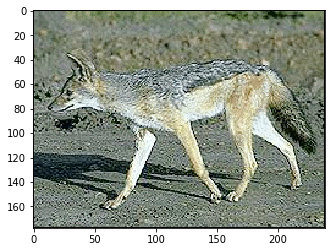

In [29]:
# ch3_38.py
import requests
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

# 要爬取的 url 網站
url = 'https://www.httpbin.org/image/jpeg'
# 向 url 請求讀取
r = requests.get(url)
# 利用 content 屬性，得到 img 的內容
img = r.content
# 輸出 headers 內容
print(r.headers)

# 有一個 handle 叫 fn
fn = 'out3_38.jpg'
# 打開 fn，並寫入 img 進入 
with open(fn, 'wb') as f_out:
    f_out.write(img)

# 讀取 fn 照片內容 
img_m = mpimg.imread(fn)
# 畫 img_m 的內容
imgplot = plt.imshow(img_m)
# 顯示圖片出來
plt.show()

## 25. 認識 Cookie 

有些網站要**辨認使用者身分**所設定的資訊。<br>
cookie 基本上是以**"鍵值"**，也就是**字典**形式配對<br>
以時候 cookie 也是伺服器為了**追蹤對話 (Session) 對象**，儲存在使用者電腦的資訊<br>
有些網站如果沒有登入，使用者是無法瀏覽的，成功登入網頁後伺服器會分配 cookie 給使用者使用<br>

In [31]:
# ch3_39.py
import requests

url = 'http://httpbin.org/cookies'
# 將 cookie 利用字典形式儲存
cookies = dict(key1 = 'value1')
# 向網站請求資訊，並登入 cookie 資訊
r = requests.get(url, cookies = cookies)
# 顯示網站得到的資訊
print(r.text)

{
  "cookies": {
    "key1": "value1"
  }
}



## 26. 設置代理 IP，在 requests.get() 內加入 proxies
避免同一 IP 太頻繁請求內容而遭到封鎖。

In [39]:
# ch3_40.py
import requests

# 利用不同的 proxies: ip + port 來進行網路爬蟲
# proxies 是字典格式的
proxies = {
  "http": "http://196.214.145.106:80",          # ip:port
  "https": "https://203.130.227.189:8080",       # ip:port
}

# 向 "https://docs.python.org" 網站請求內容，並利用不同的 proxies 請求
r = requests.get("https://docs.python.org", proxies = proxies)
# 成功請求的話 status_code == 200
if r.status_code == 200:
    print('Success')

ProxyError: HTTPSConnectionPool(host='docs.python.org', port=443): Max retries exceeded with url: / (Caused by ProxyError('Cannot connect to proxy.', NewConnectionError('<urllib3.connection.VerifiedHTTPSConnection object at 0x00000213410DA048>: Failed to establish a new connection: [WinError 10060] A connection attempt failed because the connected party did not properly respond after a period of time, or established connection failed because connected host has failed to respond')))